# 分析餐厅一个月的订单数据
### 1.加载数据
#### 2.将三个工作表合并
#### 3.清洗空数据列


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# 设置全局中文格式
matplotlib.rc('font', family='KaiTi')

data1 = pd.read_excel('../dataSets/1.Restaurant_order/meal_order_detail.xlsx', sheet_name='meal_order_detail1')
data2 = pd.read_excel('../dataSets/1.Restaurant_order/meal_order_detail.xlsx', sheet_name='meal_order_detail2')
data3 = pd.read_excel('../dataSets/1.Restaurant_order/meal_order_detail.xlsx', sheet_name='meal_order_detail3')

data = pd.concat([data1, data2, data3], axis=0)

data.dropna(axis=1, how='all', inplace=True)

data


,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442
...,...,...,...,...,...,...,...,...,...,...,...
3606,5683,672,610049,爆炒双丝,0,1,35,2016-08-31 21:53:30,0,caipu/301003.jpg,1089
3607,5686,672,609959,小炒羊腰\r\n\r\n\r\n,0,1,36,2016-08-31 21:54:40,0,caipu/202005.jpg,1089
3608,5379,647,610012,香菇鹌鹑蛋,0,1,39,2016-08-31 21:54:44,0,caipu/302001.jpg,1094
3609,5380,647,610054,不加一滴油的酸奶蛋糕,0,1,7,2016-08-31 21:55:24,0,caipu/501003.jpg,1094


In [2]:
# 求出菜品均值

# round(data['amounts'].mean(), 2)
round(np.mean(data['amounts']), 2)

44.82

### 可视化求出什么菜最受欢迎


) missing from current font.Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


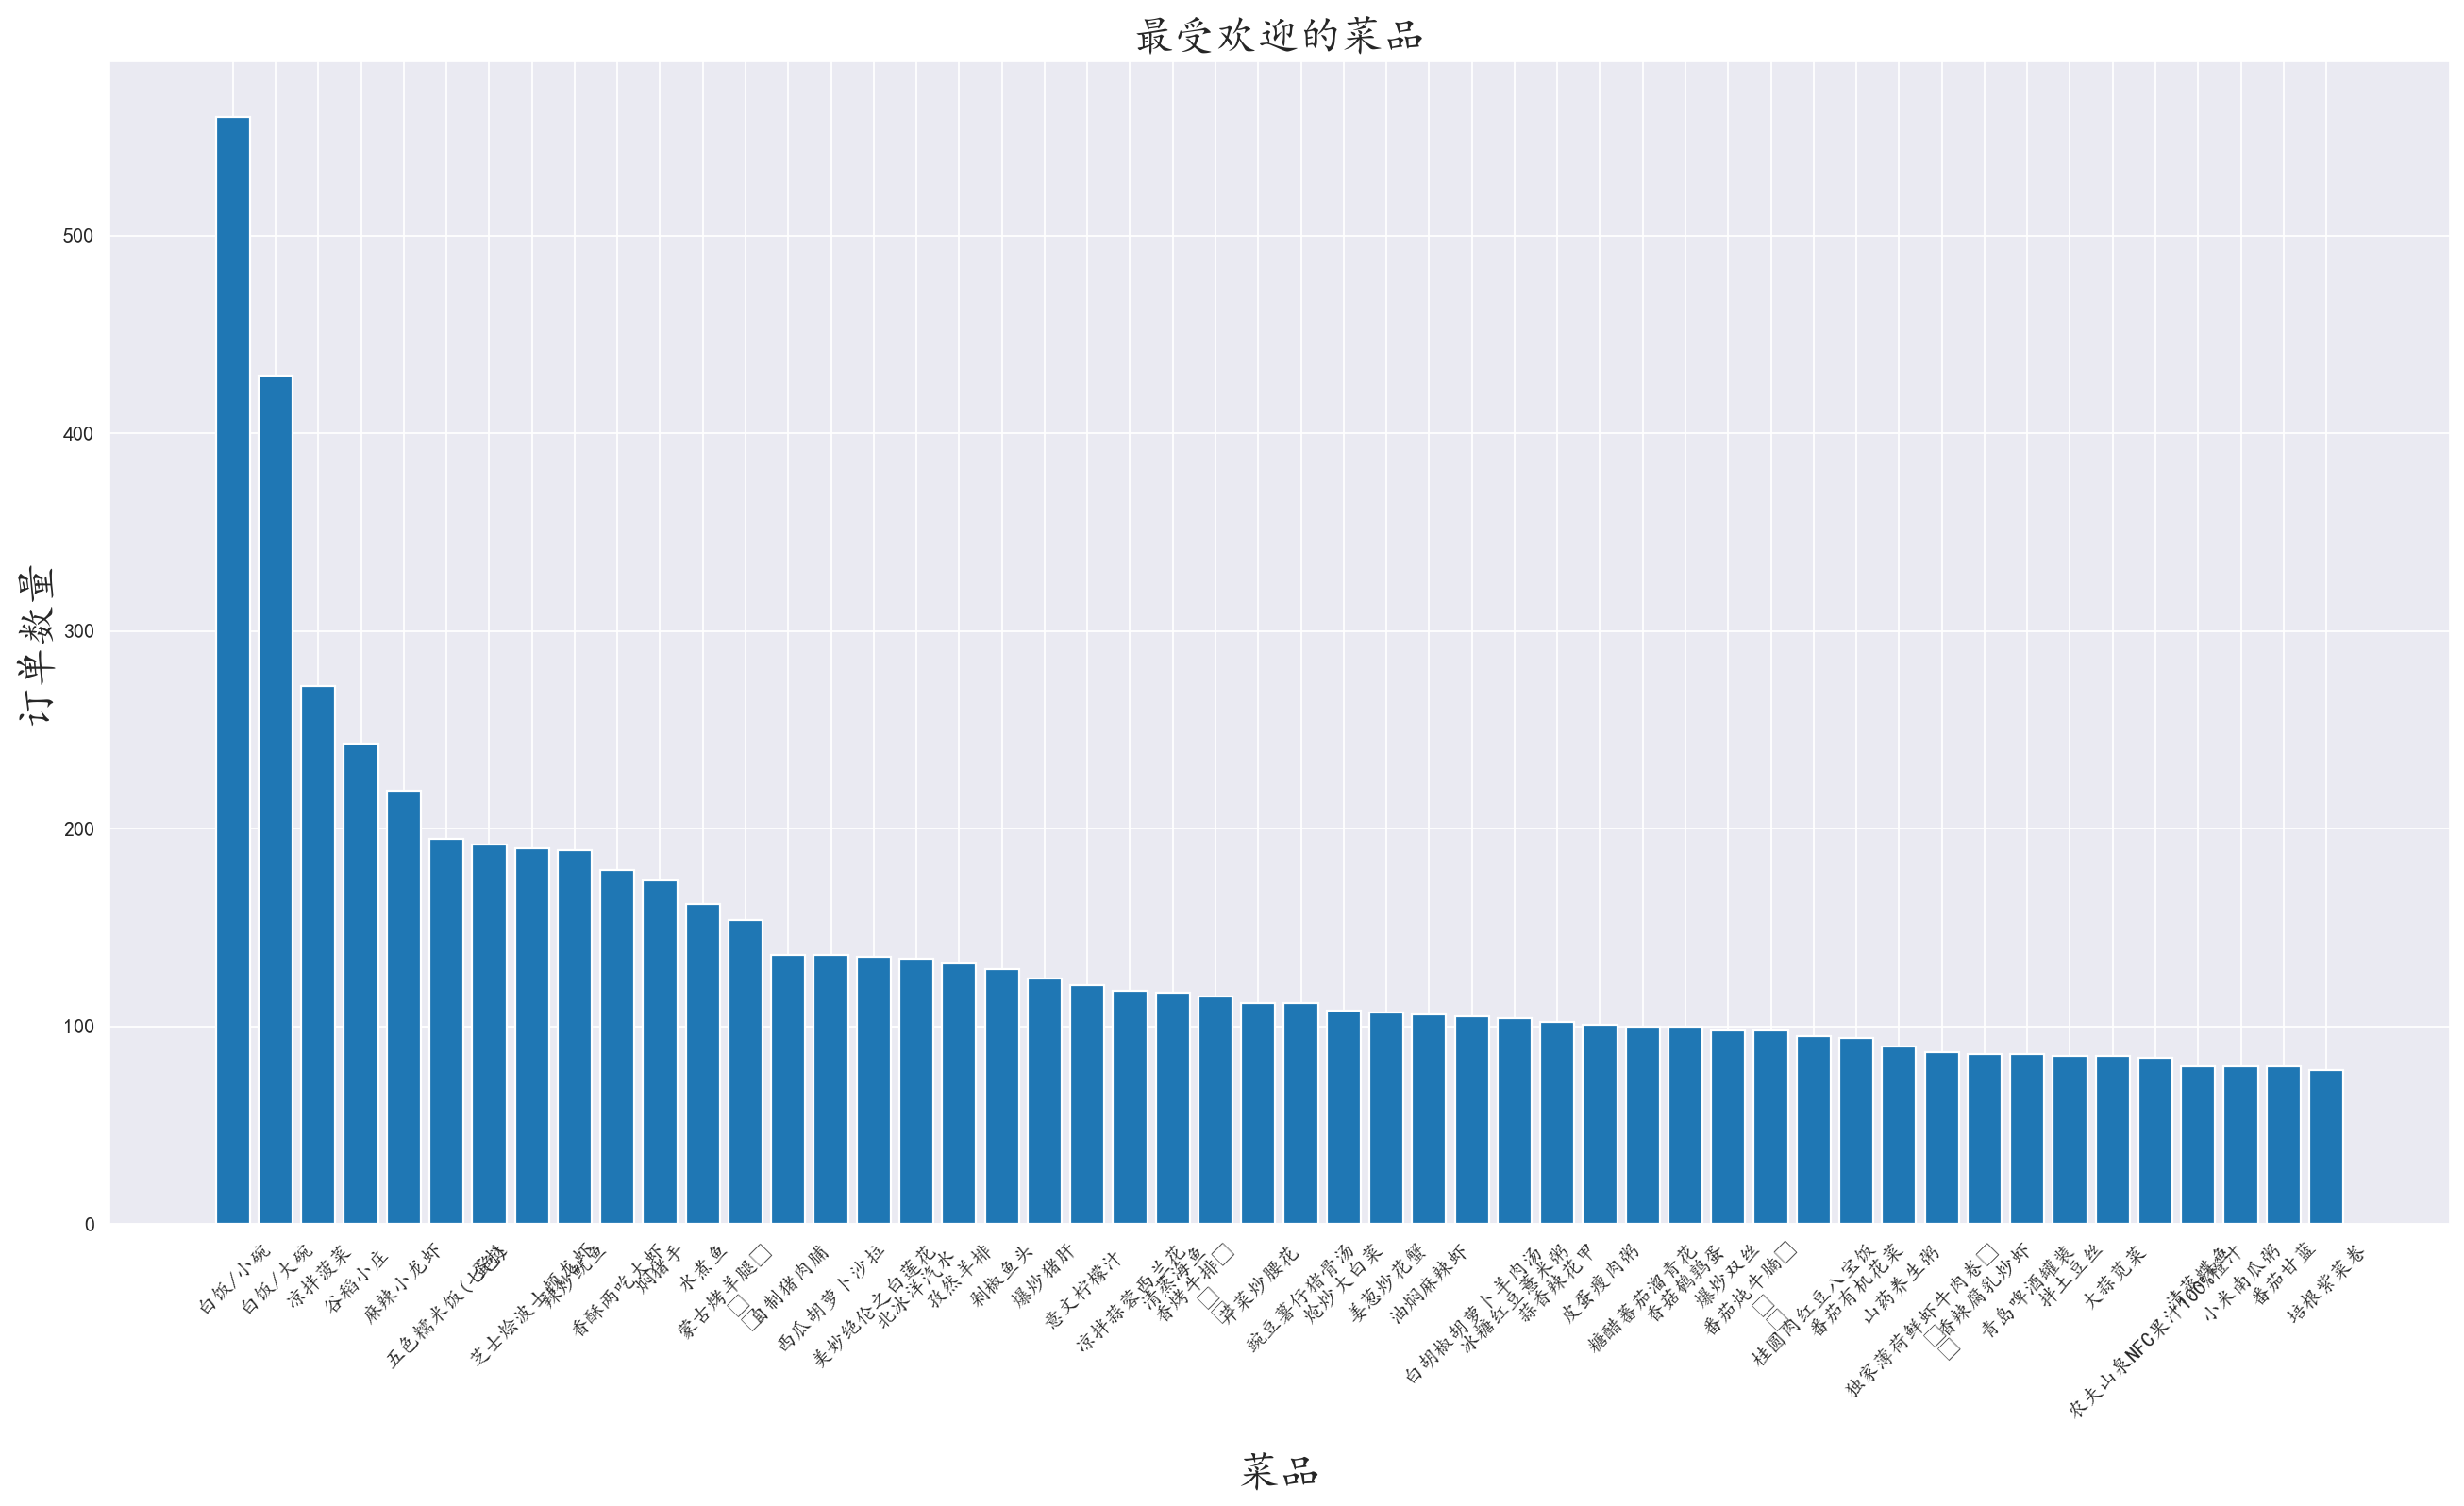

In [3]:
num_meals = data.groupby(by='dishes_name')['counts'].sum().sort_values(ascending=False)[:50]

x = num_meals.index
y = num_meals.values

plt.figure(figsize=(20, 10), dpi=160)
plt.xticks(rotation=45)
plt.bar(x, y)

plt.title('最受欢迎的菜品',fontsize=20)
plt.xlabel('菜品',fontsize=20)
plt.ylabel('订单数量',fontsize=20)

plt.show()

# 通过图表发现，米饭的数量最多，符合大众点菜习惯

### 分析点菜的种类数量


平均点了：10.65 种菜


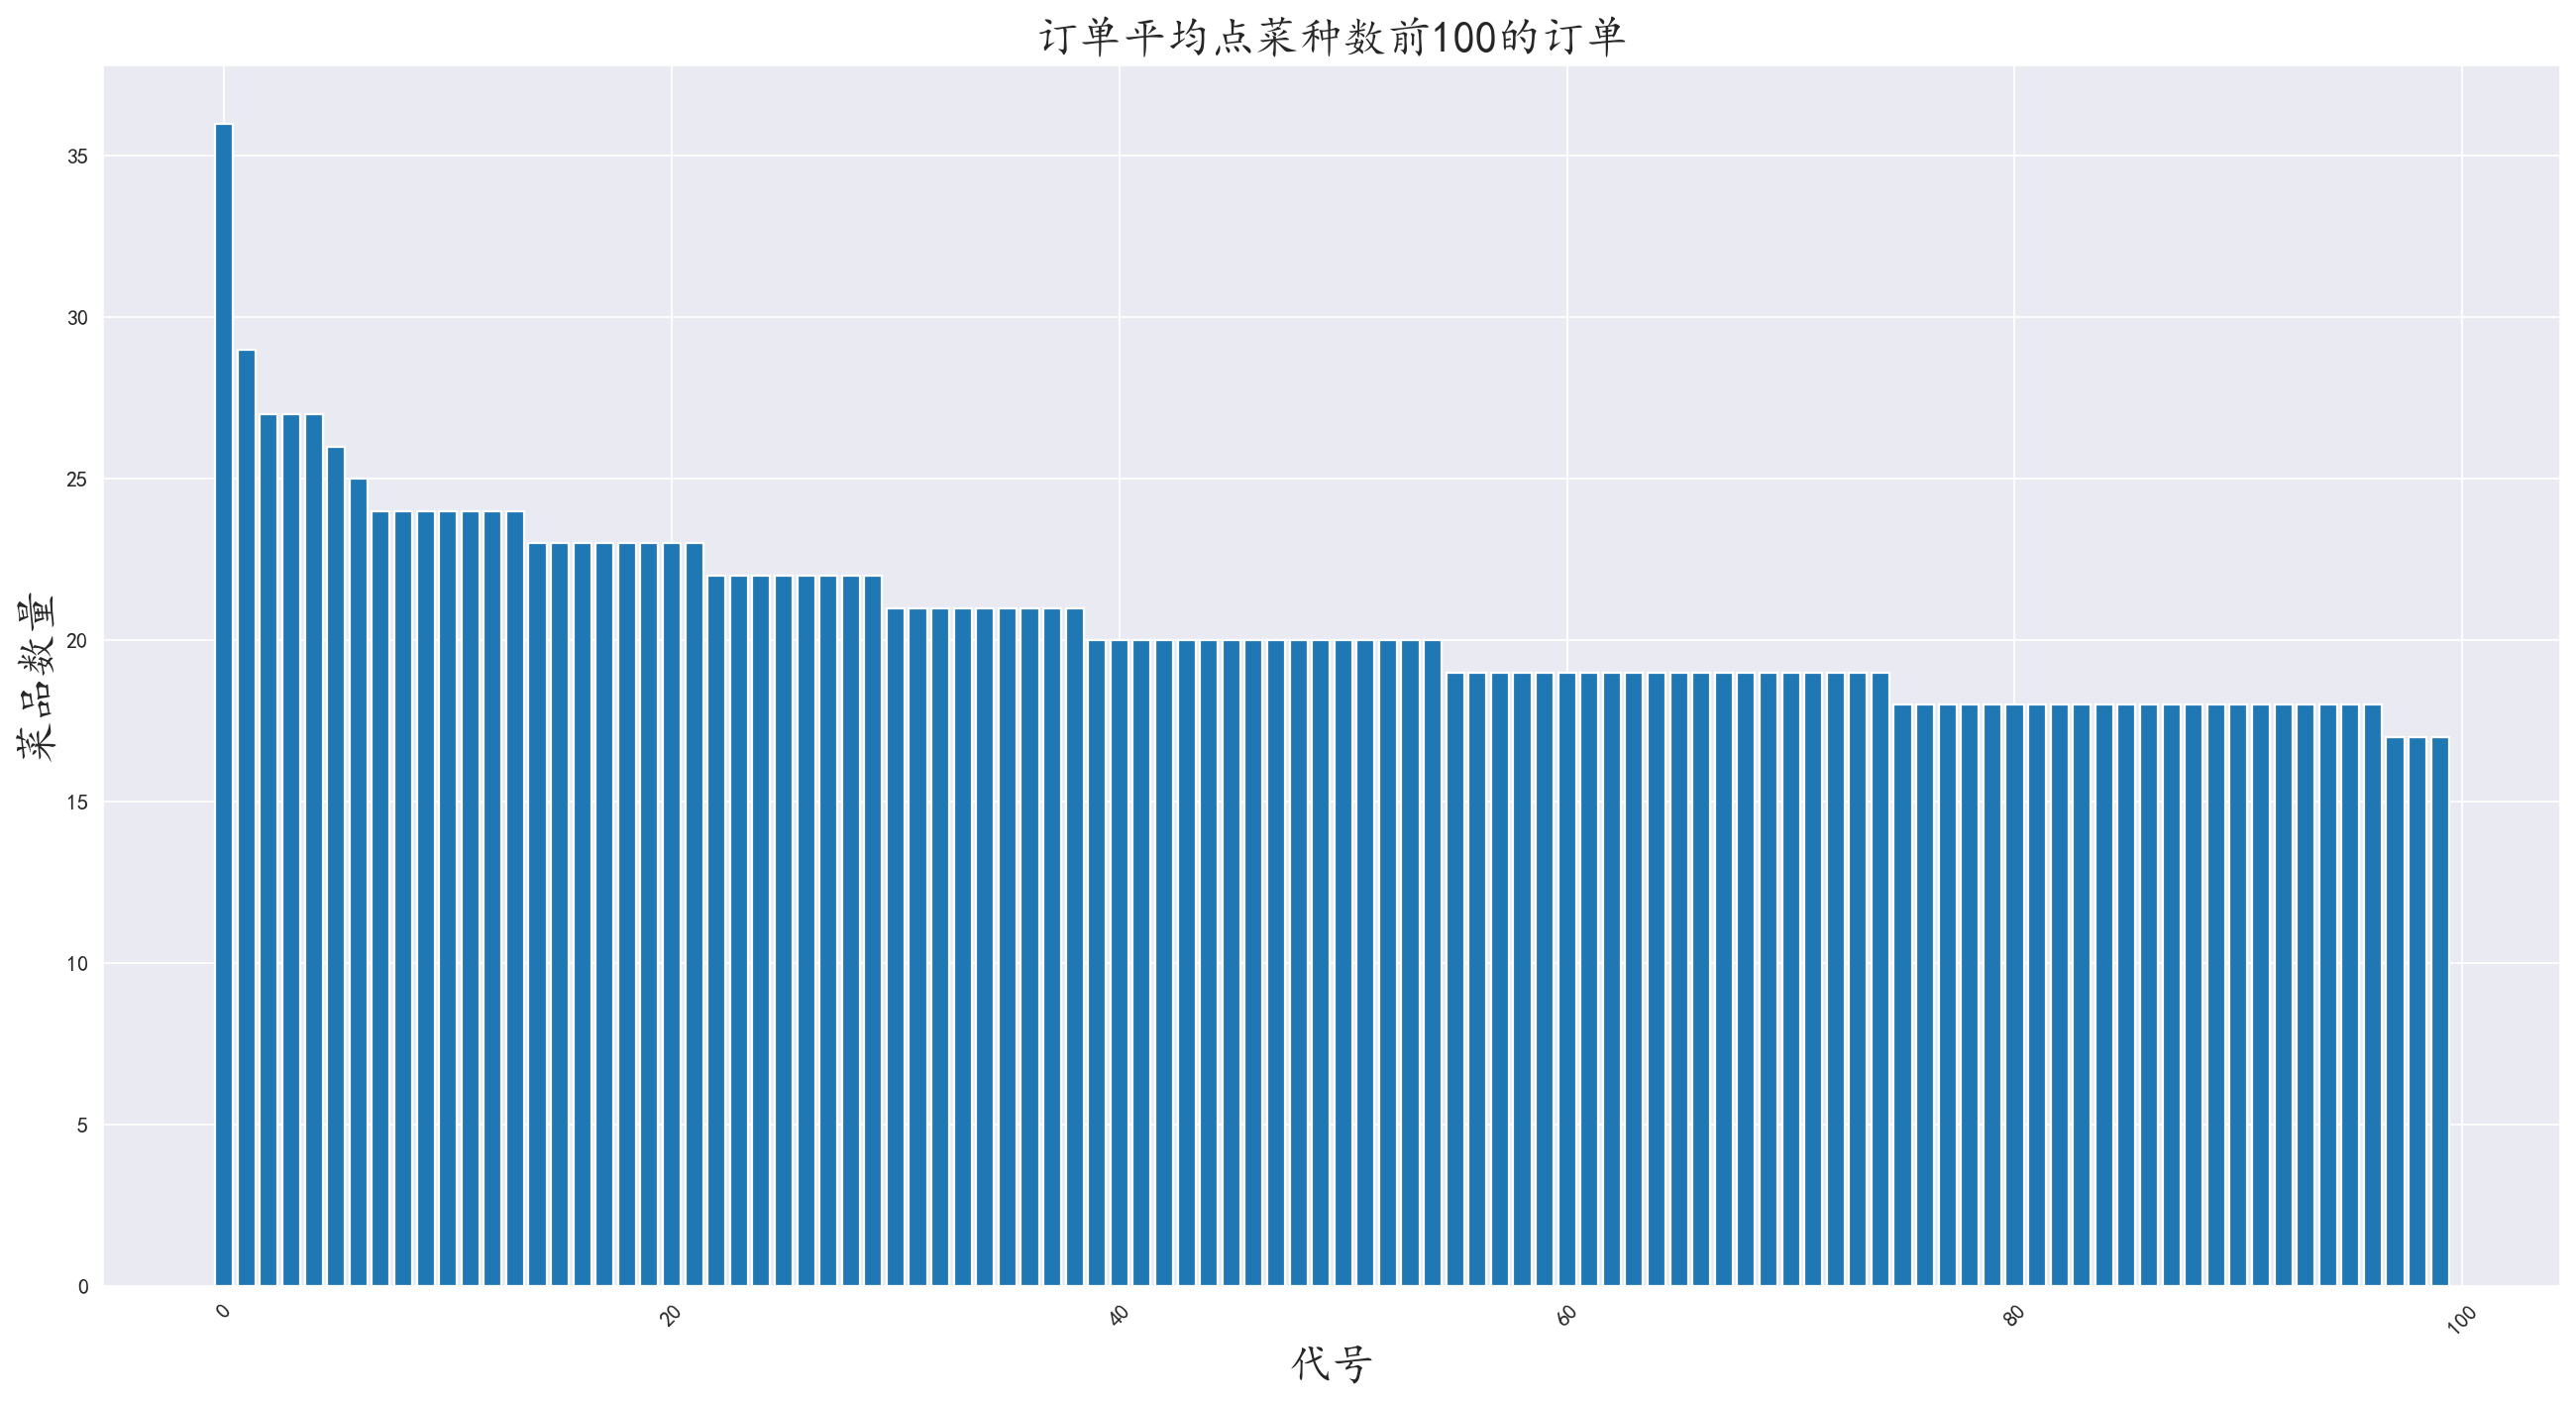

In [15]:
meals_kind = data.groupby(by='order_id')['dishes_id'].count().sort_values(ascending=False)[:100]

print(f"平均点了：{round(data.groupby(by='order_id')['dishes_id'].count().mean(), 2)} 种菜")

x = range(len(meals_kind.index))
y = meals_kind.values

plt.figure(figsize=(20, 10), dpi=160)

plt.xticks(rotation=45)

plt.title('订单平均点菜种数前100的订单',fontsize=20)
plt.xlabel('代号',fontsize=20)
plt.ylabel('菜品数量',fontsize=20)

plt.bar(x, y)

plt.show()

# 由于订单数量众多，只显示前100
# 可见前一百的订单点菜种数大都集中在20种菜左右
# 而平均点菜种数，却只有10种菜，说明大多数订单点菜数量还是集中在10种菜以下

### 分析点菜数量最多的订单


点菜数量平均为：11.81 份


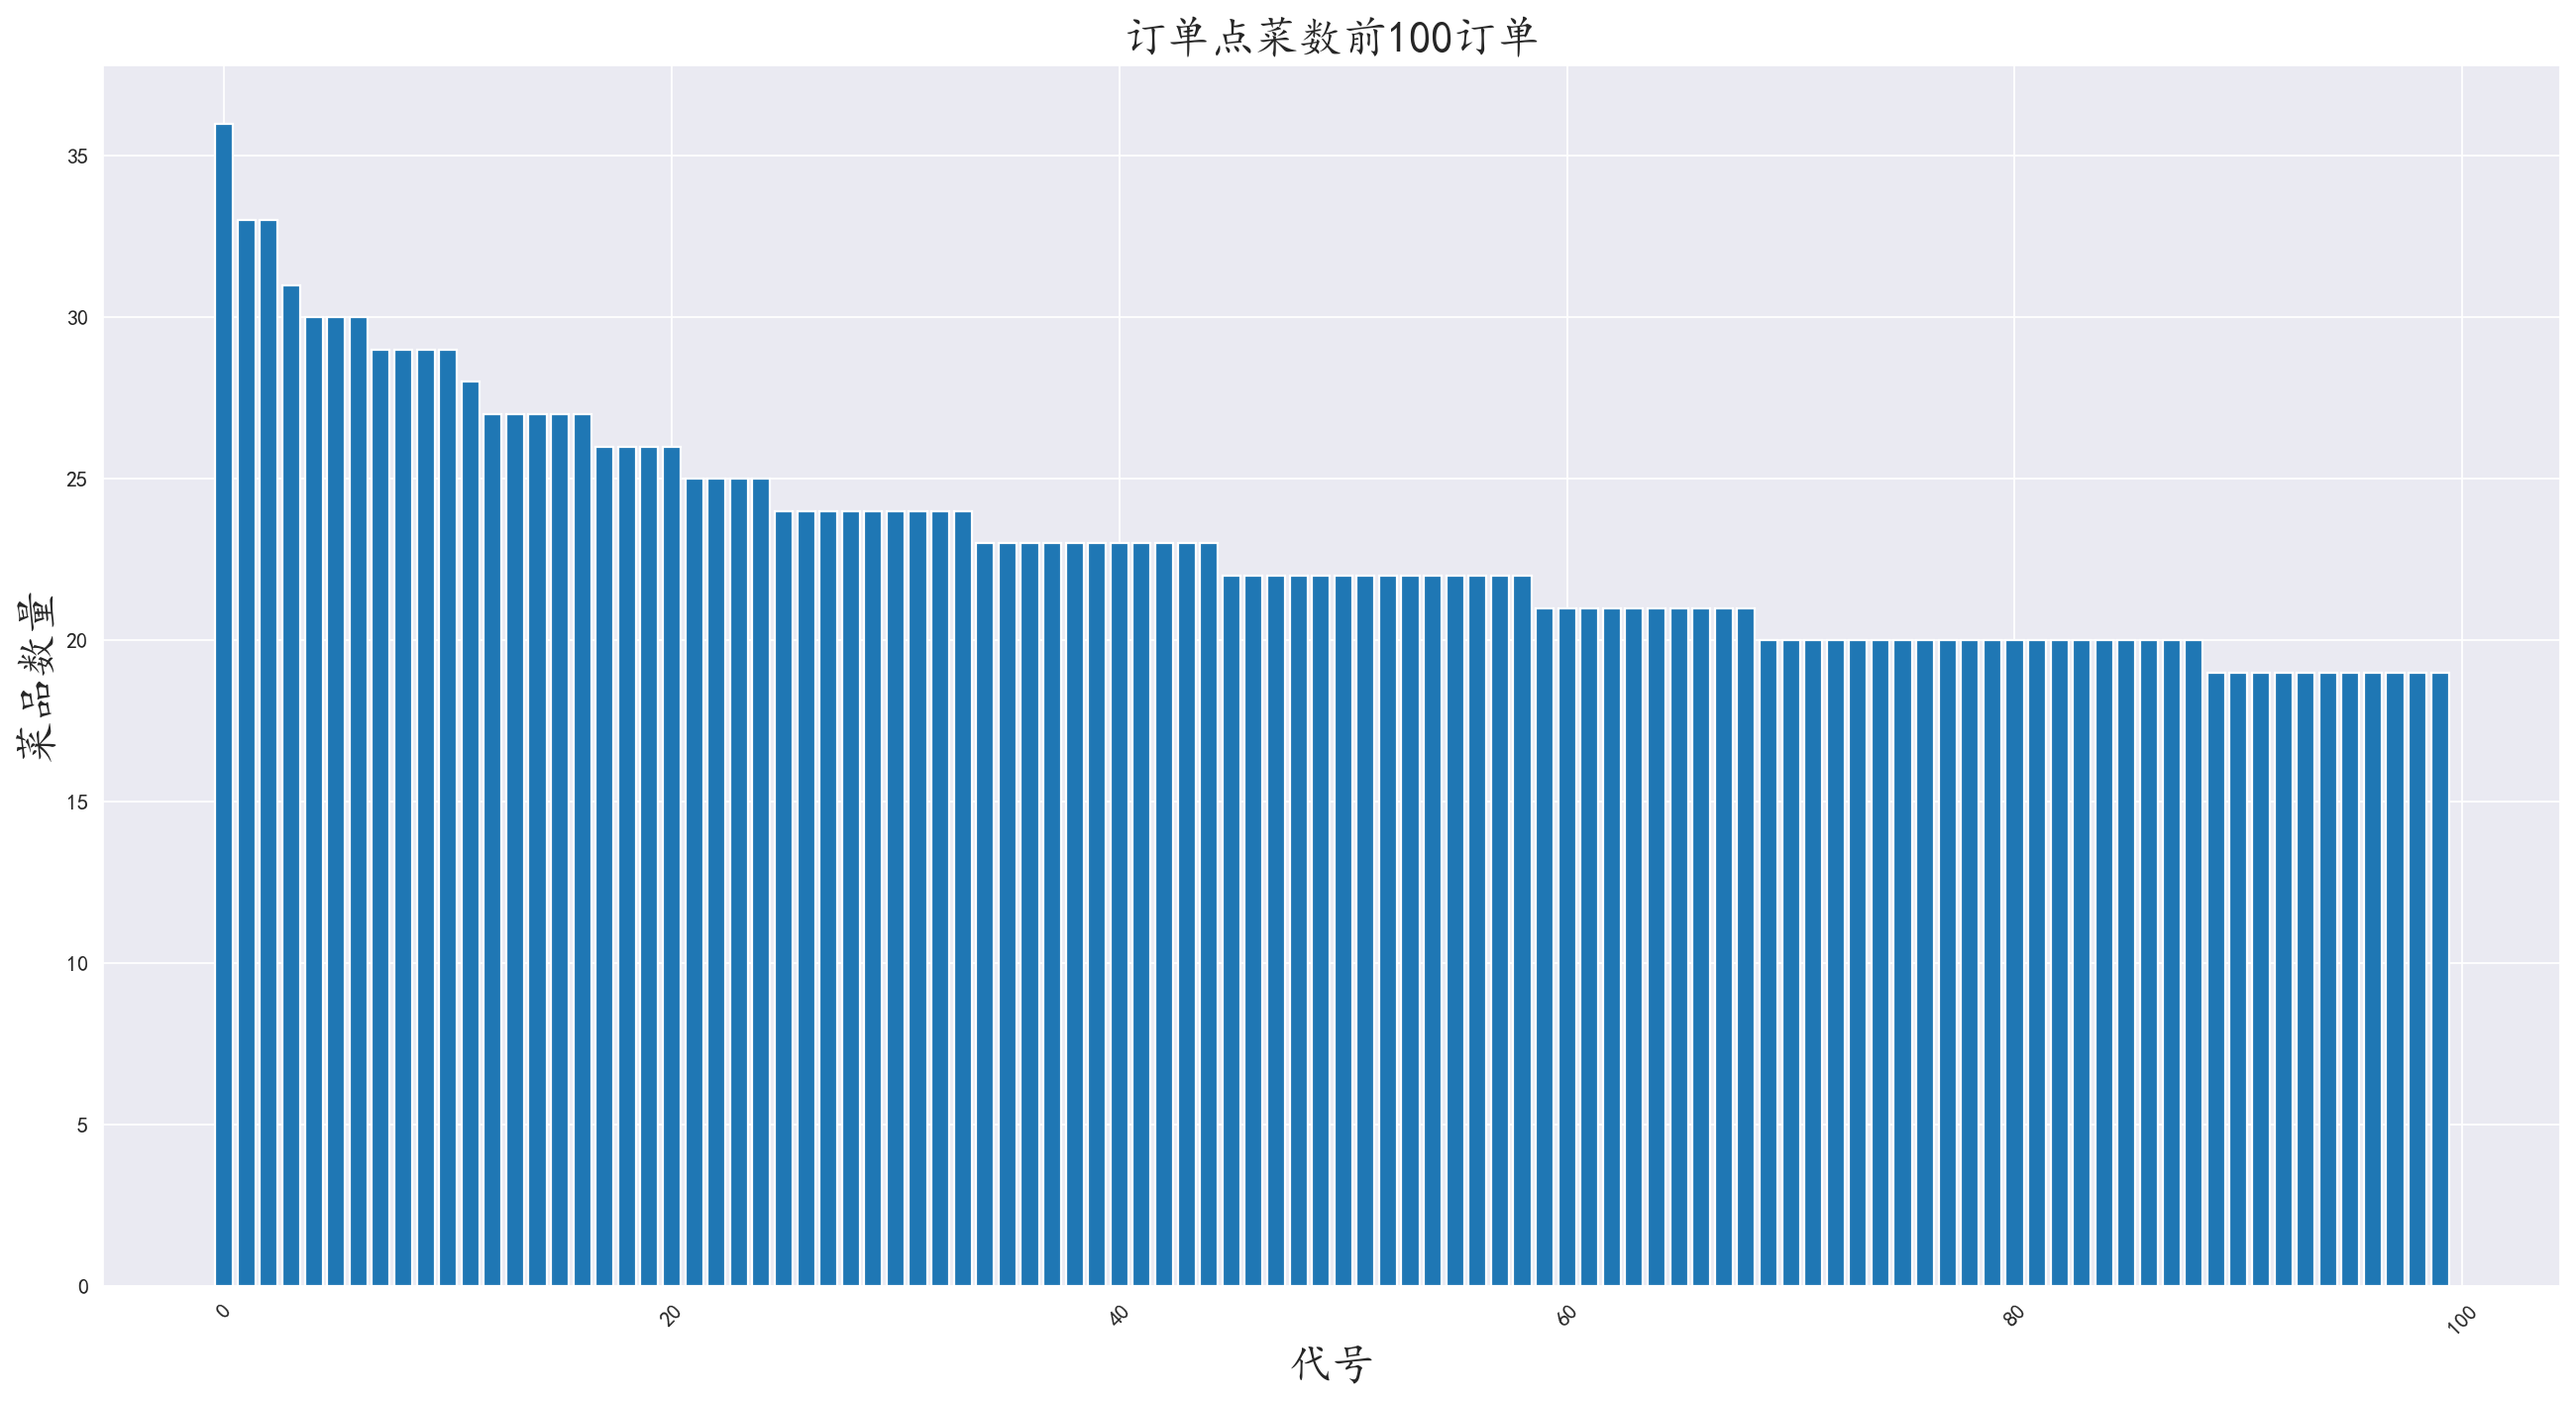

In [23]:
meals_num = data.groupby(by='order_id')['counts'].sum().sort_values(ascending=False)[:100]

print(f"点菜数量平均为：{data.groupby(by='order_id')['counts'].sum().mean().round(2)} 份")

x = range(len(meals_num.index))
y = meals_num.values

plt.figure(figsize=(20, 10), dpi=160)

plt.xticks(rotation=45)

plt.title('订单点菜数前100订单',fontsize=20)
plt.xlabel('代号',fontsize=20)
plt.ylabel('菜品数量',fontsize=20)

plt.bar(x, y)

plt.show()

# 由于订单数量众多，只显示前100
# 可见前一百的订单点菜数量大都集中在25道菜左右
# 而平均点菜种数，却只有12道菜，说明大多数订单点菜数量还是集中在12道菜以下

### 为了方便，将ID，点菜数量，菜品价格，和新列总价创建为一个新表


In [6]:
data['total_price'] = data['counts'] * data['amounts']

dataGroup = data[['order_id', 'counts', 'amounts', 'total_price']].groupby(by='order_id').sum()

dataGroup



,counts,amounts,total_price
order_id,,,
137,9,194,197
162,18,1032,1101
163,10,182,217
165,21,953,1147
166,7,241,260
...,...,...,...
1320,1,78,78
1321,7,458,458
1322,13,547,635


### 求出平均消费和消费排序图

平均消费金额为：492.25 元


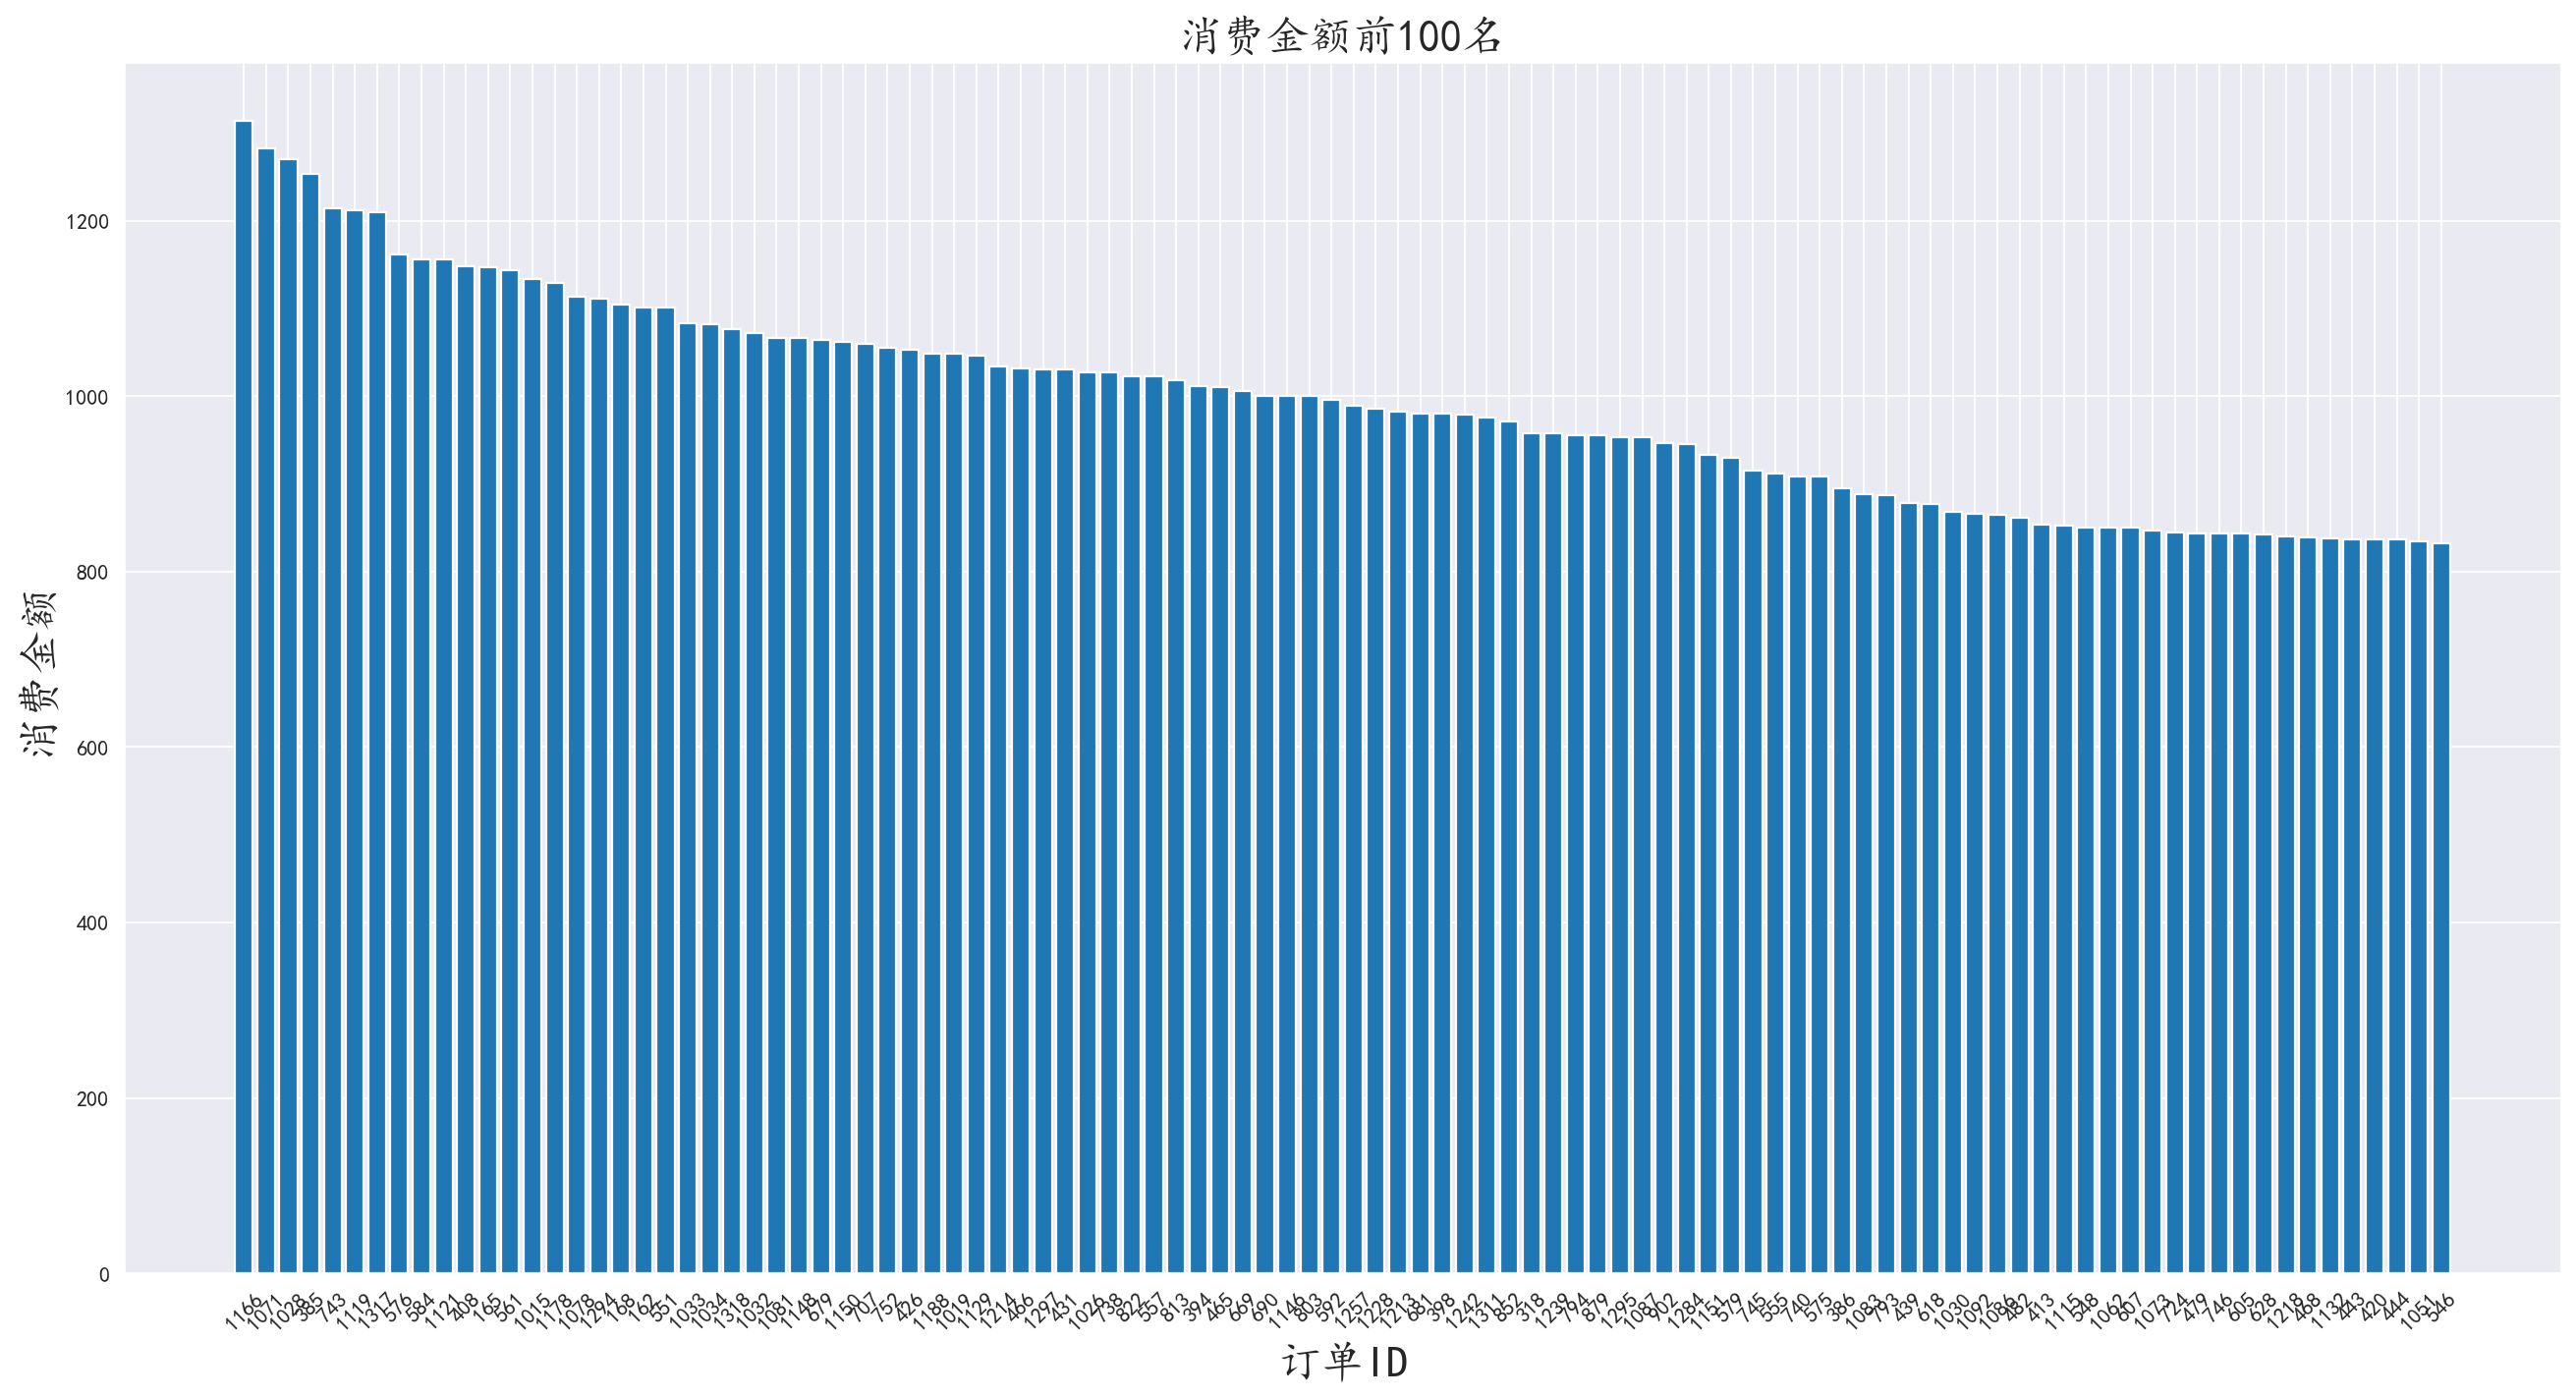

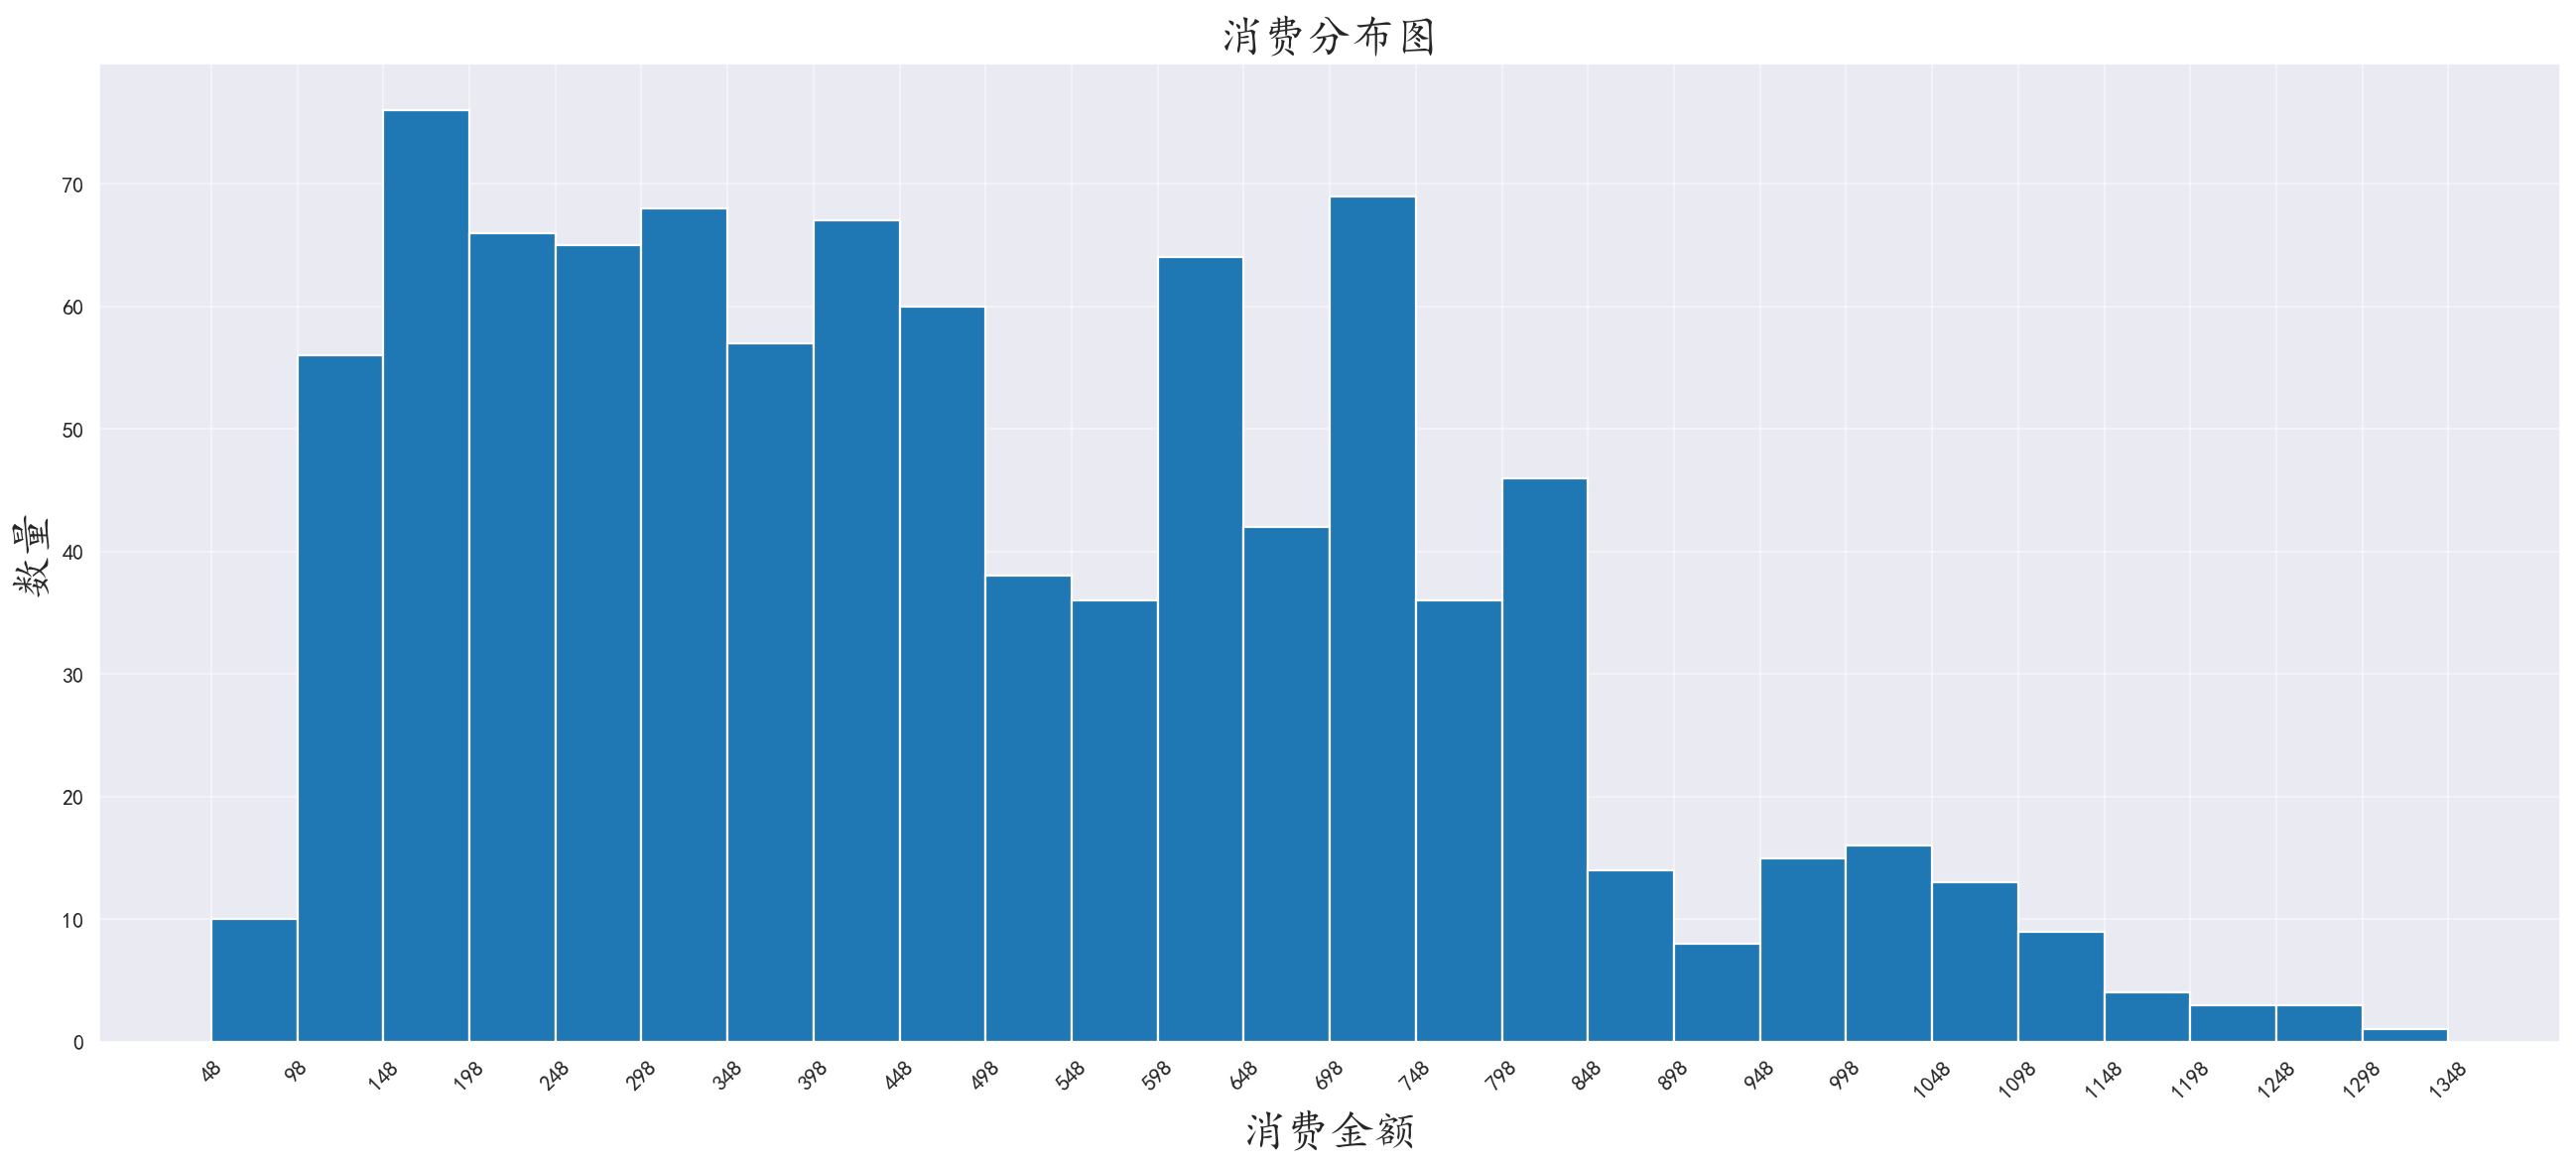

In [17]:
spend_data = dataGroup['total_price'].sort_values(ascending=False)[:100]
x = range(len(spend_data.index))
y = spend_data.values

print(f"平均消费金额为：{dataGroup['total_price'].mean().round(2)} 元")

plt.figure(figsize=(20, 10), dpi=160)

plt.xticks(x, spend_data.index, rotation=45)

plt.title('消费金额前100名', fontsize=20)
plt.xlabel('订单ID', fontsize=20)
plt.ylabel('消费金额', fontsize=20)

plt.bar(x, y)

plt.show()

distance = dataGroup['total_price'].max() - dataGroup['total_price'].min()

bin_gap = 50

bins = distance // bin_gap

plt.figure(figsize=(20, 8), dpi=160)

plt.xticks(range(dataGroup['total_price'].min(), dataGroup['total_price'].max() + bin_gap, bin_gap), rotation=45)

plt.title('消费分布图', fontsize=20)
plt.xlabel('消费金额', fontsize=20)
plt.ylabel('数量', fontsize=20)

plt.hist(dataGroup['total_price'], bins=range(dataGroup['total_price'].min(), dataGroup['total_price'].max() + bin_gap, bin_gap))
plt.grid(alpha=0.5)
plt.show()

# 通过条形图发现，前100名平均为1000元左右
# 根据直方图发现，高消费数量很少，多数顾客消费大约在100~800之间

### 求出菜均消费

菜均金额为：41.99 元


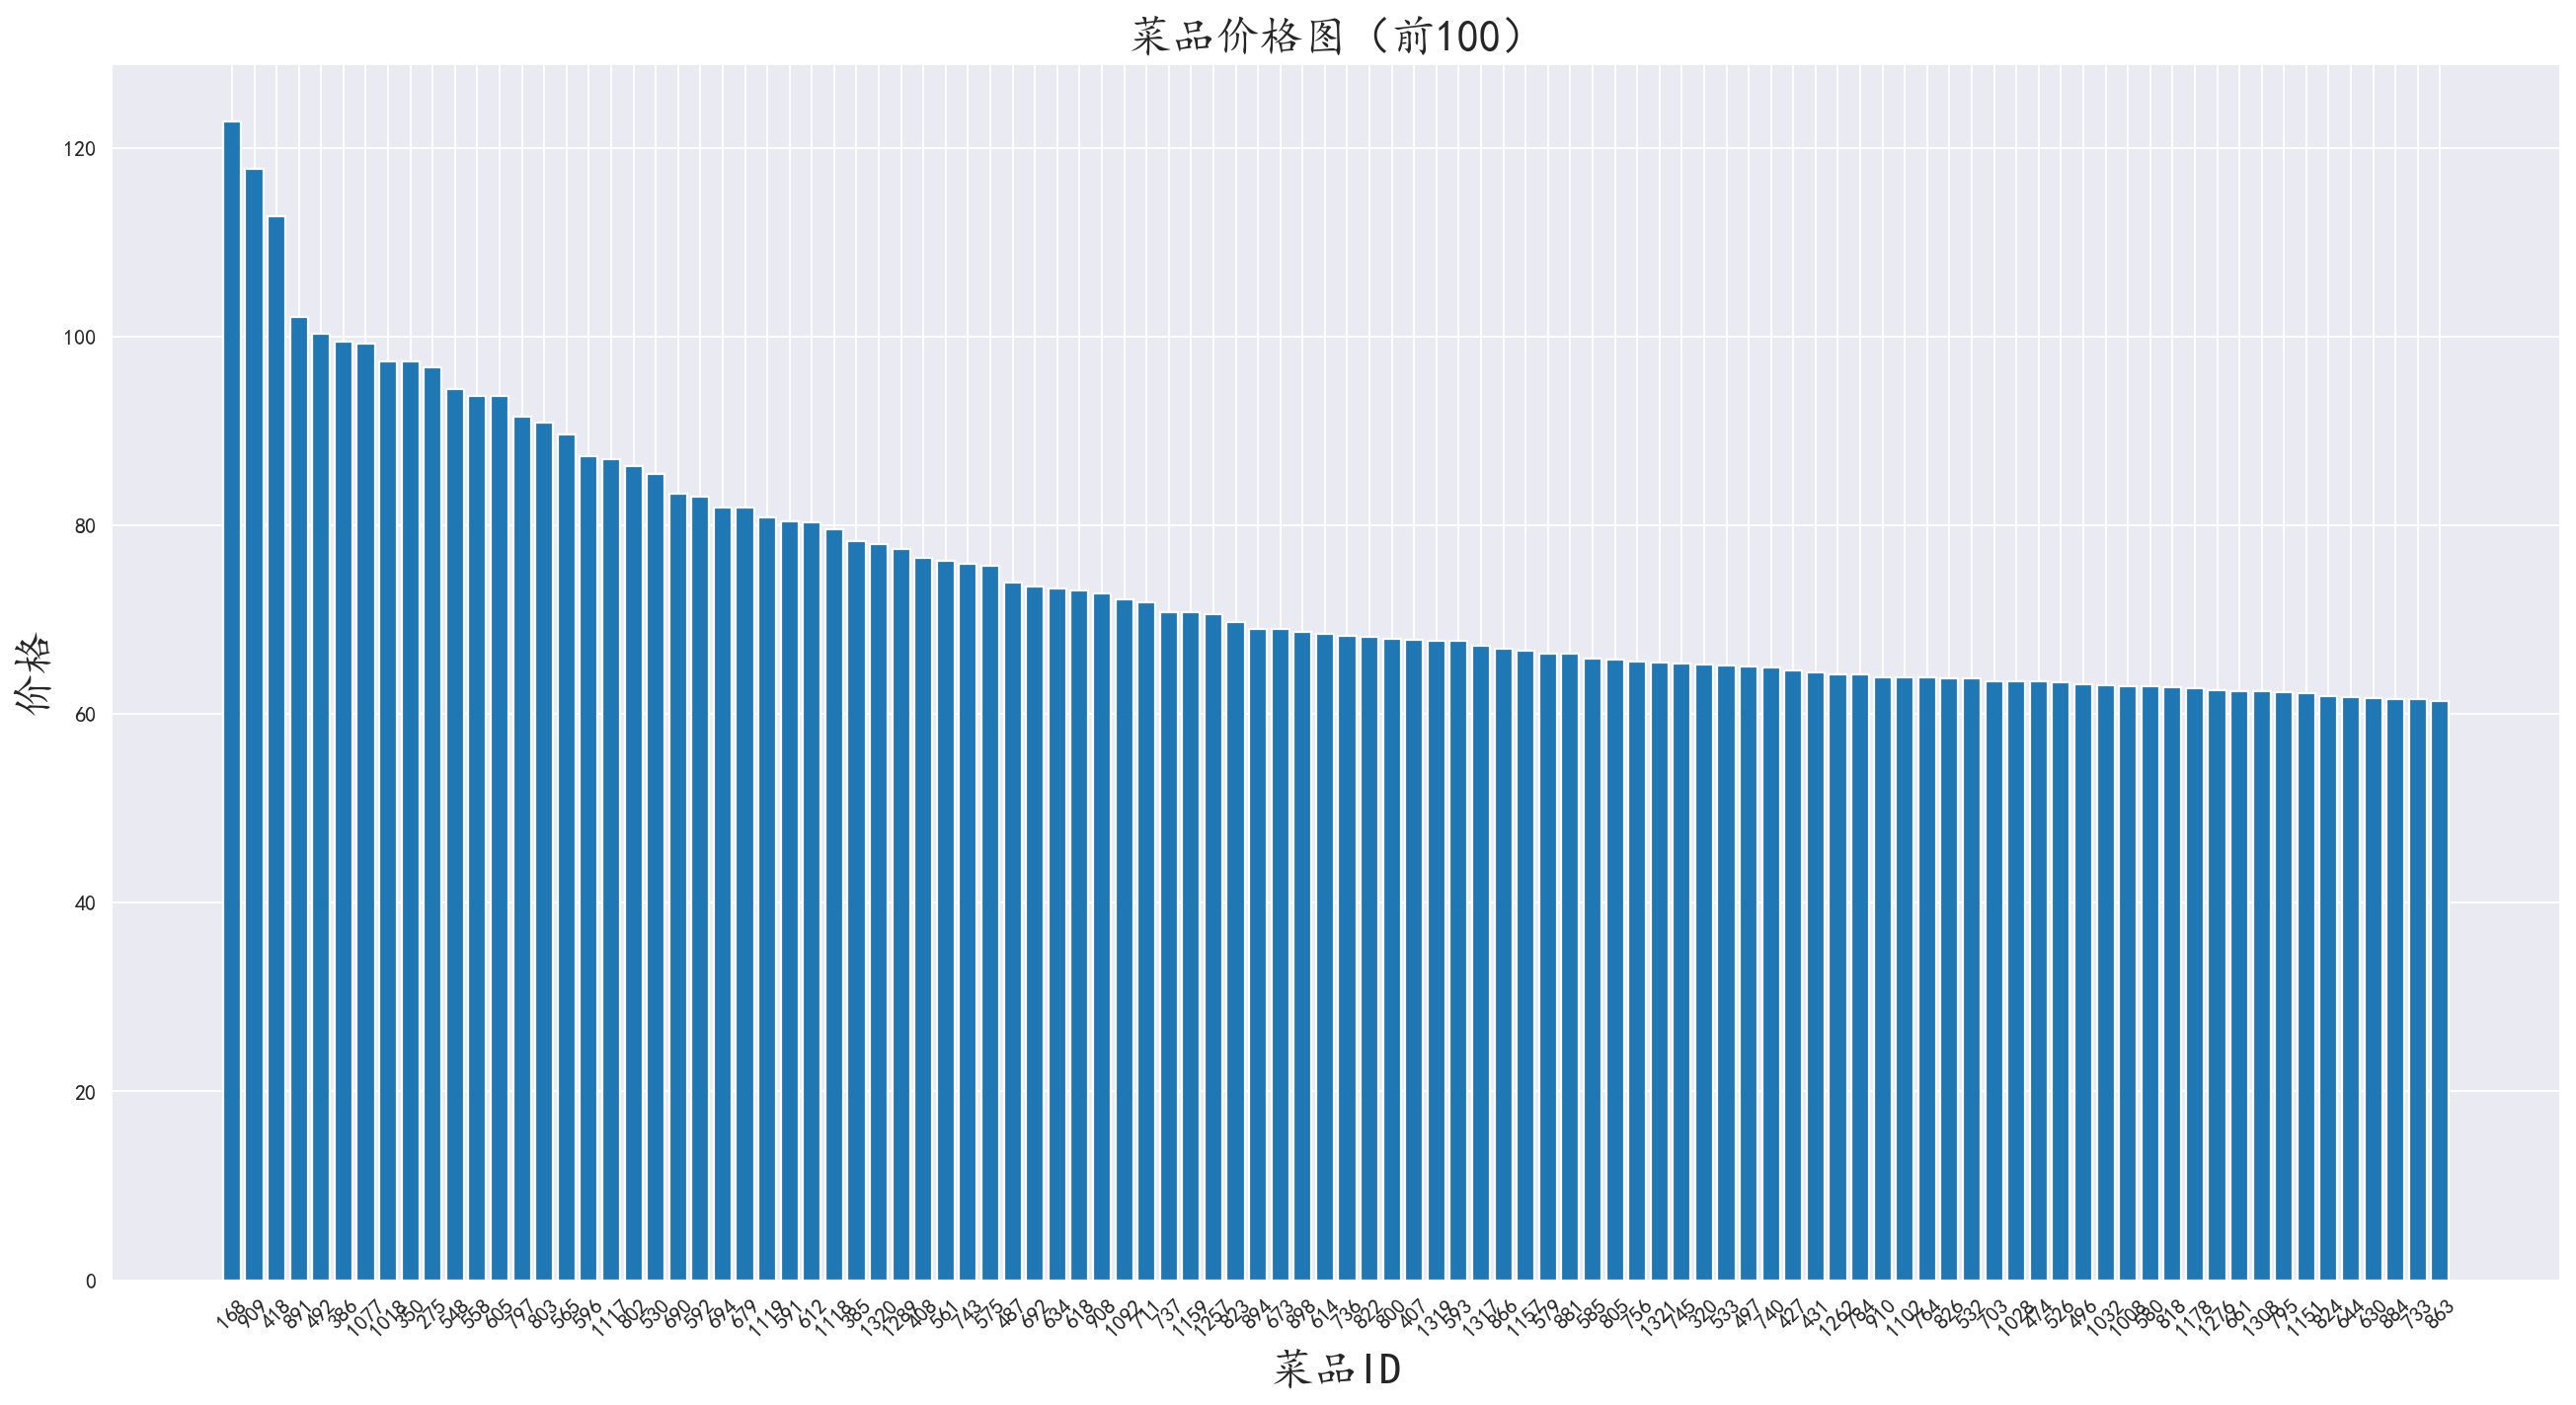

In [19]:
dataGroup['average_price'] = (dataGroup['total_price'] / dataGroup['counts']).round(2)

average_data = dataGroup['average_price'].sort_values(ascending=False)[:100]

print(f"菜均金额为：{dataGroup['average_price'].mean().round(2)} 元")

x = range(len(average_data.index))
y = average_data.values

plt.figure(figsize=(20, 10), dpi=160)

plt.xticks(x, average_data.index, rotation=45)

plt.title('菜品价格图（前100）', fontsize=20)
plt.xlabel('菜品ID', fontsize=20)
plt.ylabel('价格', fontsize=20)

plt.bar(x, y)

plt.show()

### 分析每段时间点餐数量


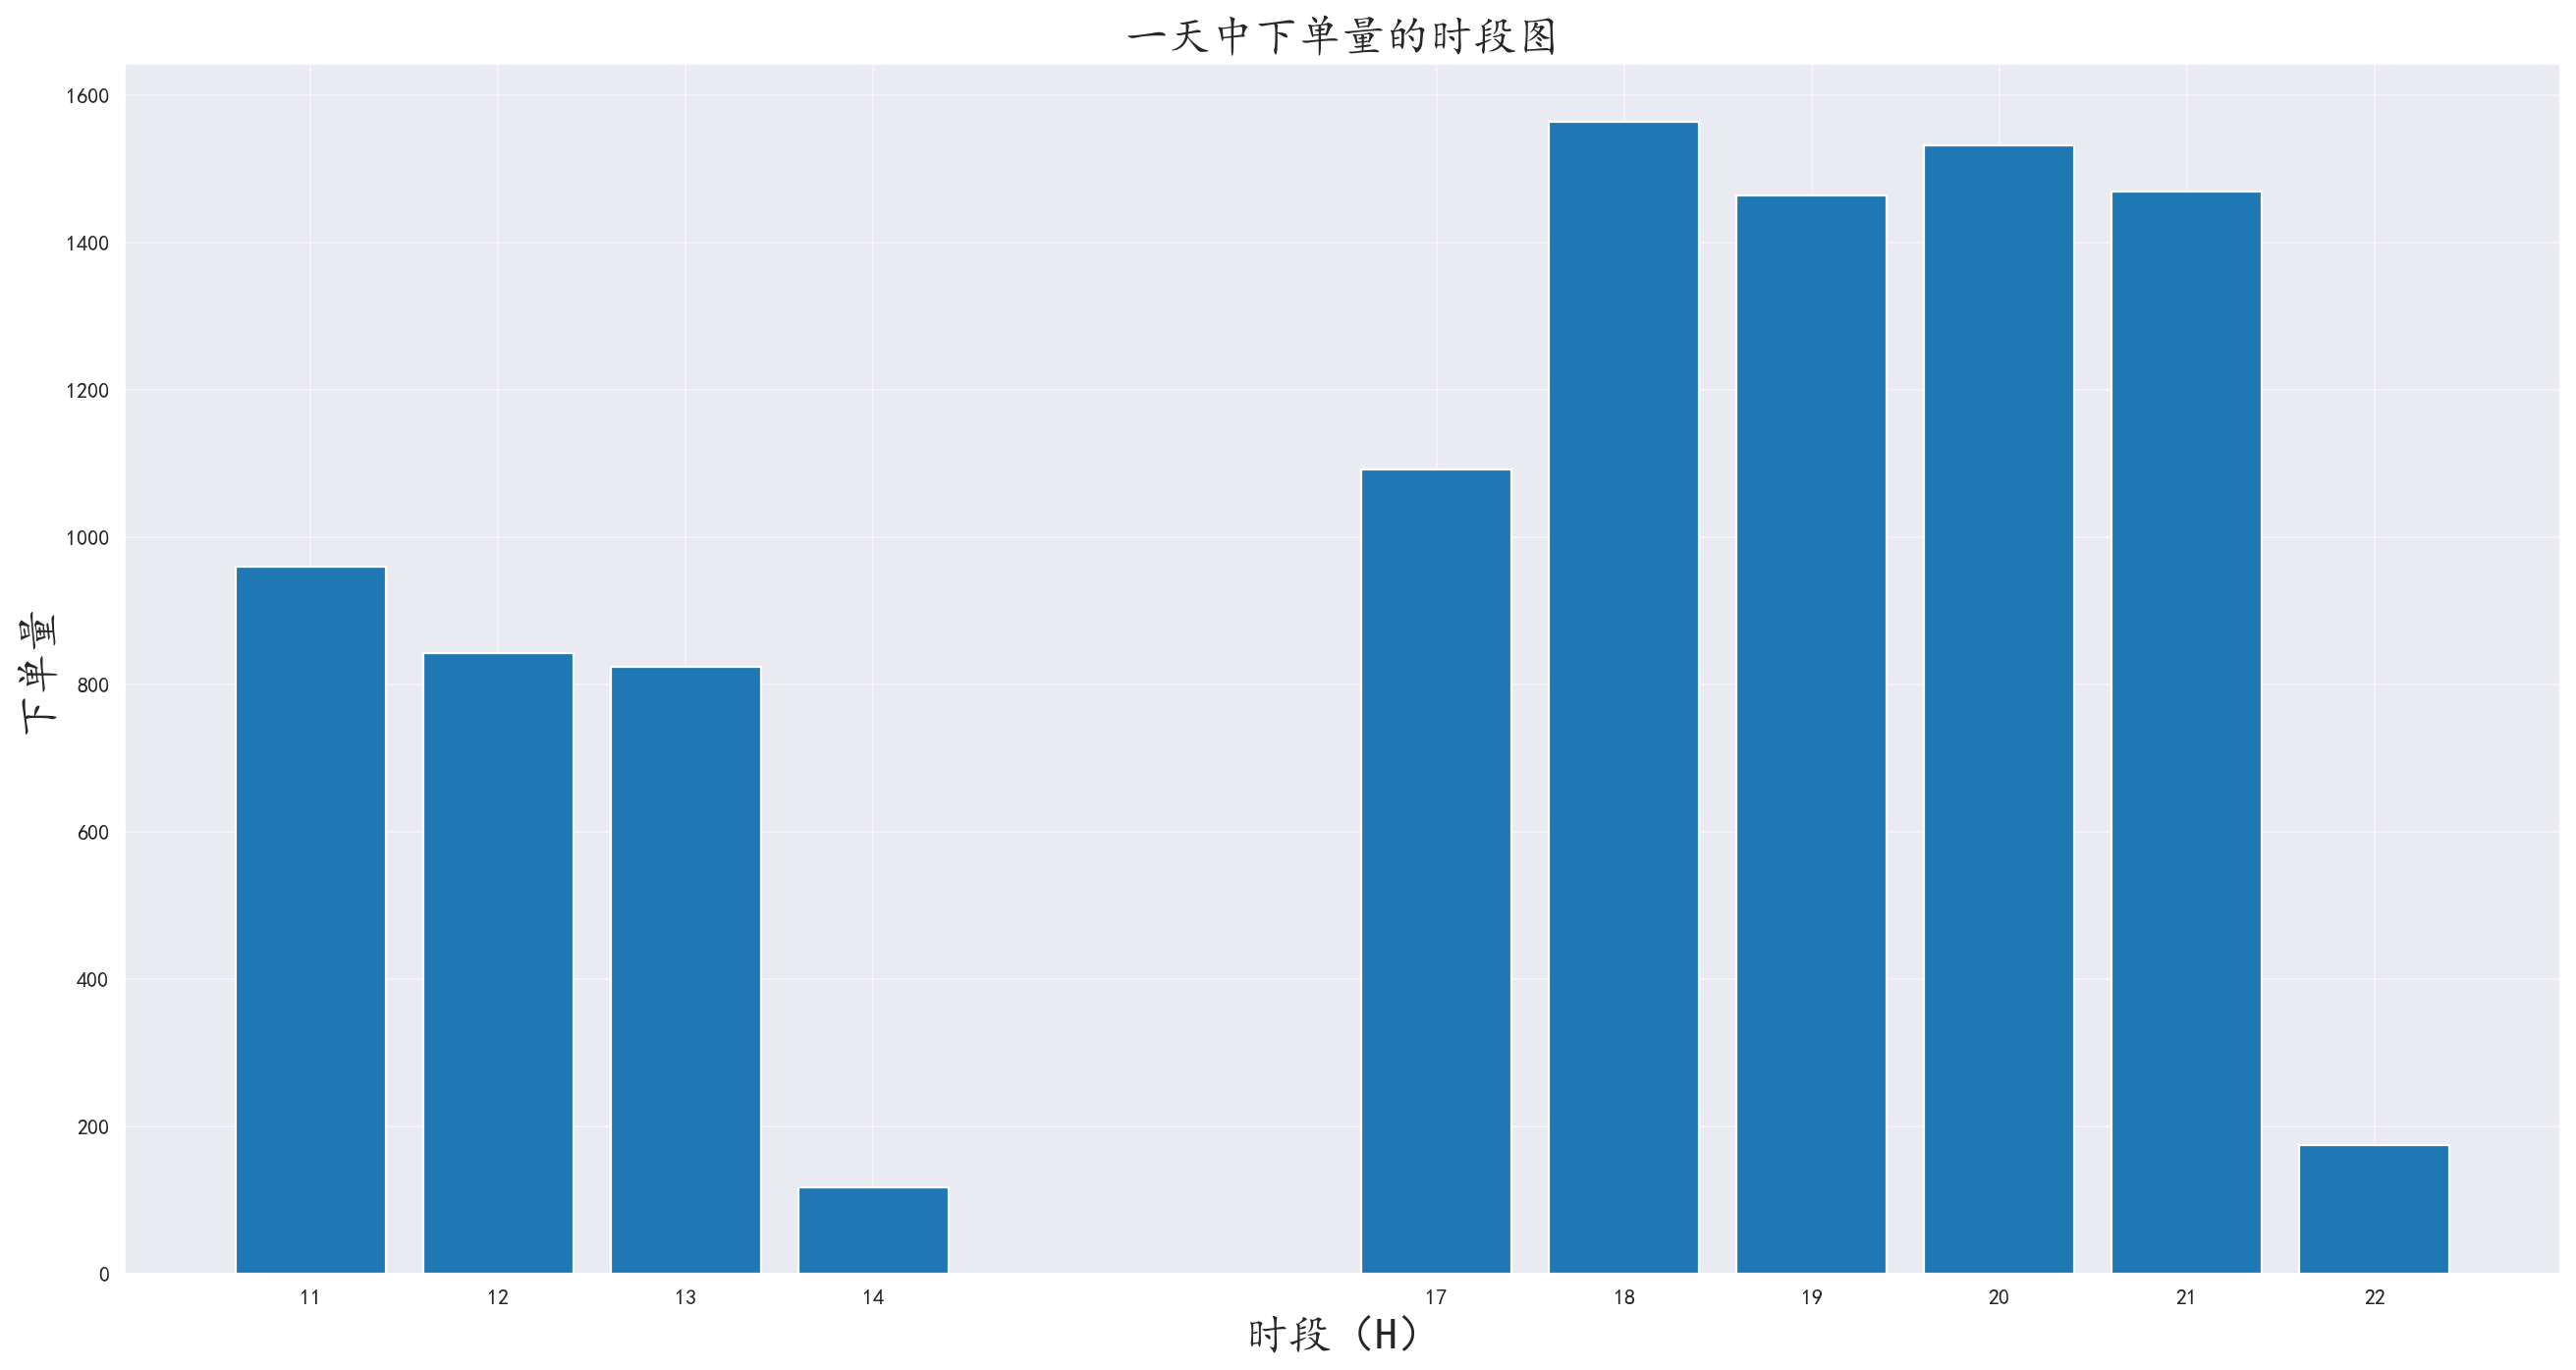

In [20]:
data['Time'] = pd.to_datetime(data['place_order_time'])

data['period'] = data['Time'].map(lambda element: element.hour)

period_count = data.groupby(by='period').count()['order_id']

x = period_count.index
y = period_count.values

plt.figure(figsize=(20, 10), dpi=160)

plt.xticks(x)

plt.title('一天中下单量的时段图', fontsize=20)
plt.xlabel('时段（H）', fontsize=20)
plt.ylabel('下单量', fontsize=20)

plt.bar(x, y)

plt.grid(alpha=0.5)

plt.show()

# 通过图发现，主要消费时间段为11点~13点和17点~21点
# 时间段符合饭点规律，并且发现晚上的订单要比白天要多，猜测餐厅地段属于夜生活丰富的地段，或者上班族较多的地带，一般下班后来聚餐

### 查看哪天的订单量最多

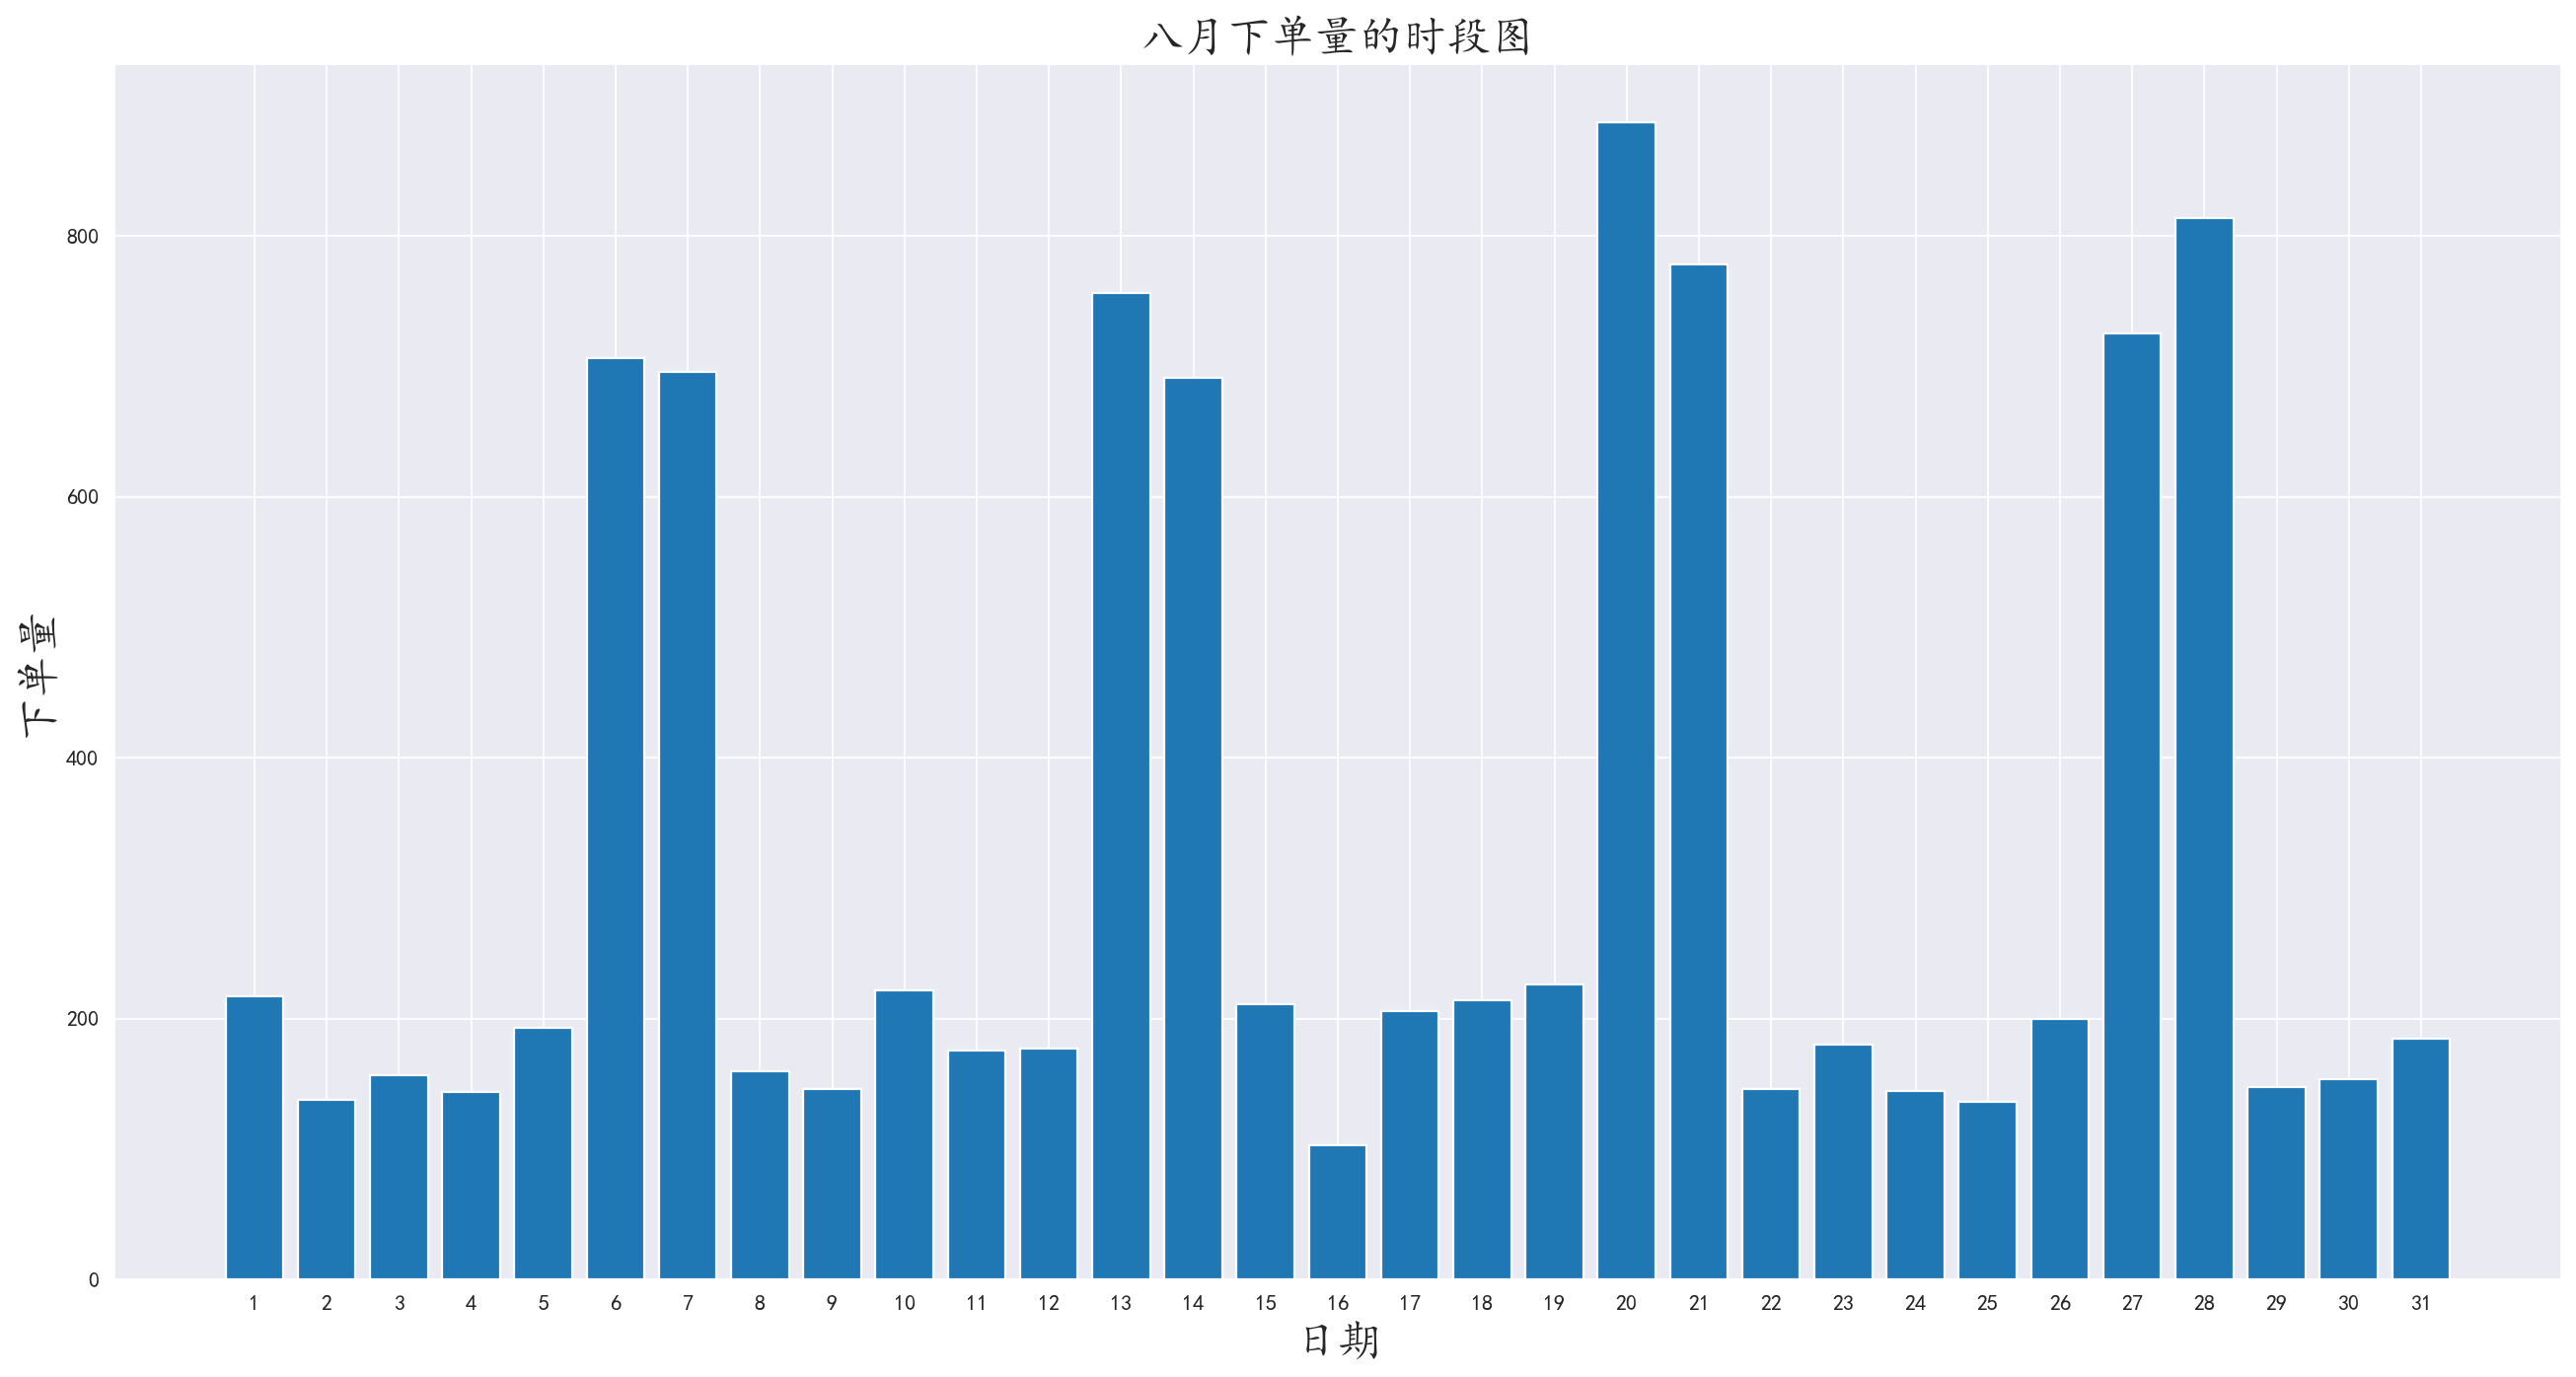

In [21]:

data['day'] = data['Time'].map(lambda element: element.day)

day_count = data.groupby(by='day').count()['order_id']

x = day_count.index
y = day_count.values

plt.figure(figsize=(20, 10), dpi=160)

plt.xticks(x)

plt.title('八月下单量的时段图', fontsize=20)
plt.xlabel('日期', fontsize=20)
plt.ylabel('下单量', fontsize=20)

plt.bar(x, y)

plt.show()

# 通过图发现，消费集中在一周的周末时间段，说明人们在周末往往会选择下馆子在犒劳工作一周的自己
# 商家可以加大对周末的优惠力度，以及人手安排，以应对周末暴增的订单数量

# 查看哪个星期的下单量最多

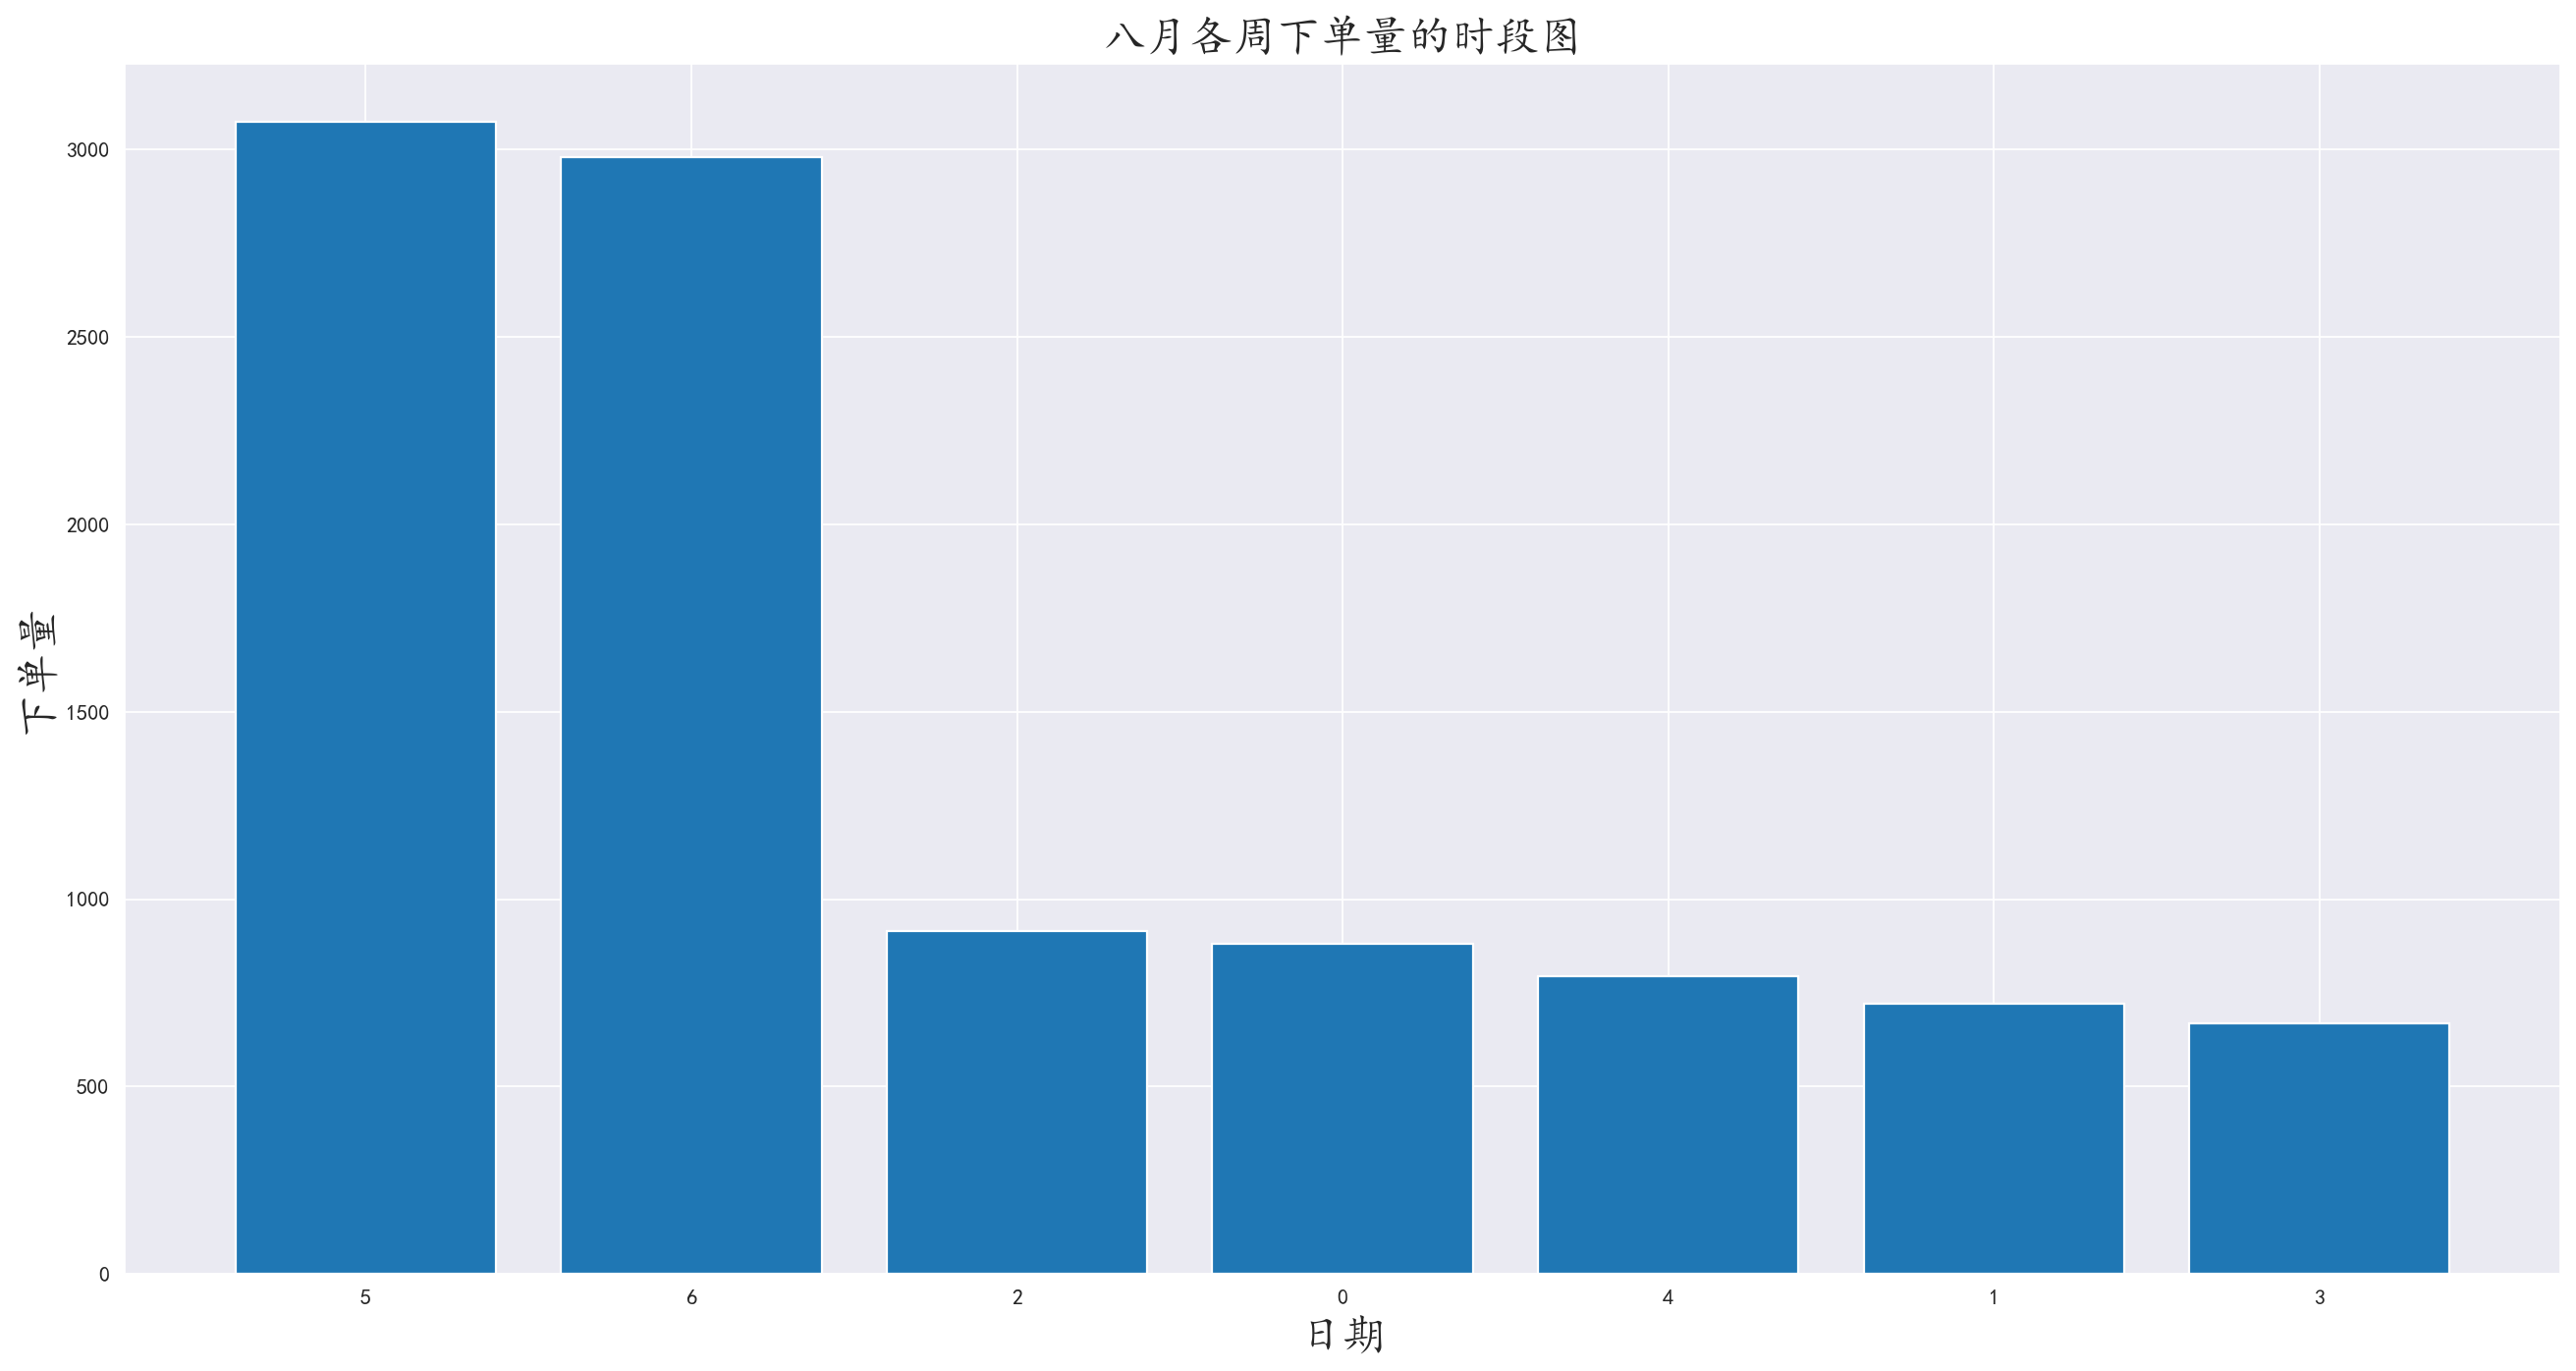

In [22]:
data['week'] = data['Time'].map(lambda element: element.weekday())
weekday_count = data.groupby(by='week').count()['order_id'].sort_values(ascending=False)

x = weekday_count.index
y = weekday_count.values

plt.figure(figsize=(20, 10), dpi=160)

plt.xticks(range(len(x)), x)

plt.title('八月各周下单量的时段图', fontsize=20)
plt.xlabel('日期', fontsize=20)
plt.ylabel('下单量', fontsize=20)

plt.bar(range(len(x)), y)

plt.show()

# 通过图不难发现，在月末的订单量比平时更多，说明月末人们发完工资之后，往往会与朋友家人下馆子
# 商家可以针对月末实施一些优惠政策，或者一些活动以增加客户粘度